<a href="https://colab.research.google.com/github/ajaythakur3369/The-Sparks-Foundation-Internship-Tasks/blob/main/Task_6_Prediction_using_Decision_Tree_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Prediction using Decision Tree Algorithm**
## **Developed By - Ajay Thakur (2016kuec2026@iiitkota.ac.in)**
## **Branch Name - Electronics and Communication Engineering**
## **Institute Name - Indian Institute of Information Technology Kota (An Institute of National Importance under an Act of Parliament)**
## **Submitted To - The Sparks Foundation**
## **Project Link (GitHub) - [Click here](https://github.com/ajaythakur3369/The-Sparks-Foundation-Internship-Tasks/blob/main/Task_6_Prediction_using_Decision_Tree_Algorithm.ipynb)**
## **Project Link (Drive) - [Click here](https://colab.research.google.com/drive/12fsKA8Sp86Fc3Cv0RYKVBO9aiNACHekA)**

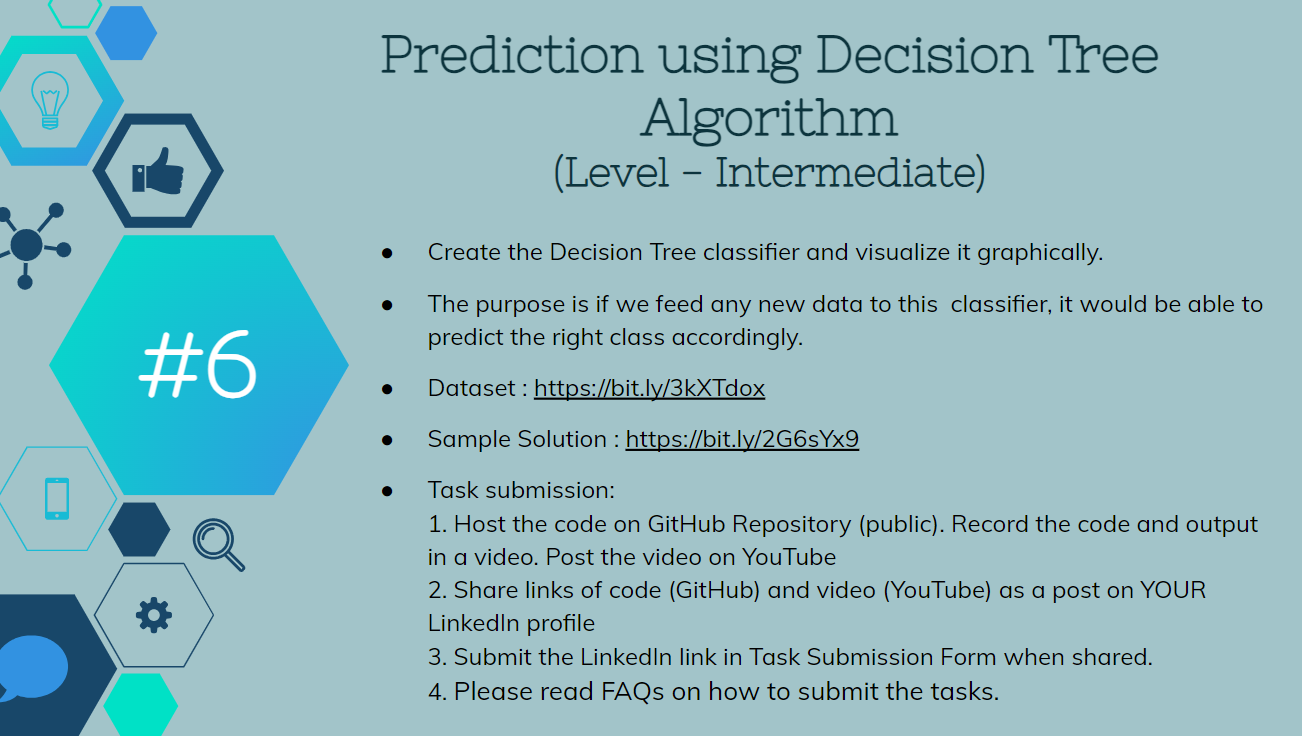

# **Problem Statement -**

**Objective -** Create the Decision Tree classifier and visualize it graphically.

The purpose is if we feed any data to this classifier, it would be able to predict the right class accordingly.


# **General Guidelines -**

Task submission:

1.	Host the code on GitHub Repository (public). Record the code and output in a video. Post the video on YouTube

2.	Share links of code (GitHub) and video (YouTube) as a post on Your Linkedin profile.

3.	Submit the Linkedin link in Task Submission Form when shared.

4.	Please read FAQs on how to submit the tasks.


# **Let's Begin !**

### **Import Libaries**

In [1]:
# Imported all the required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import graphviz

import sklearn.datasets as datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import tree

import six
import sys
sys.modules['sklearn.externals.six'] = six
from six import StringIO
from sklearn.tree import export_graphviz

import pydotplus
from IPython.display import Image

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import accuracy_score

### **Display Data**

In [2]:
# Access the Drive from Colab, for accessing required file
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# Read deliveries dataset
data = pd.read_csv('/content/drive/MyDrive/folders/Task_6_TSF_File.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Checking the shape
data.shape

(150, 6)

In [6]:
# Checking for missing values, size, datatypes etc
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
#  Drop id colcolumn
data.drop(columns = ['Id'], axis = 1, inplace = True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
# Getting a statistical summary
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# Data points count value for each label class
data.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

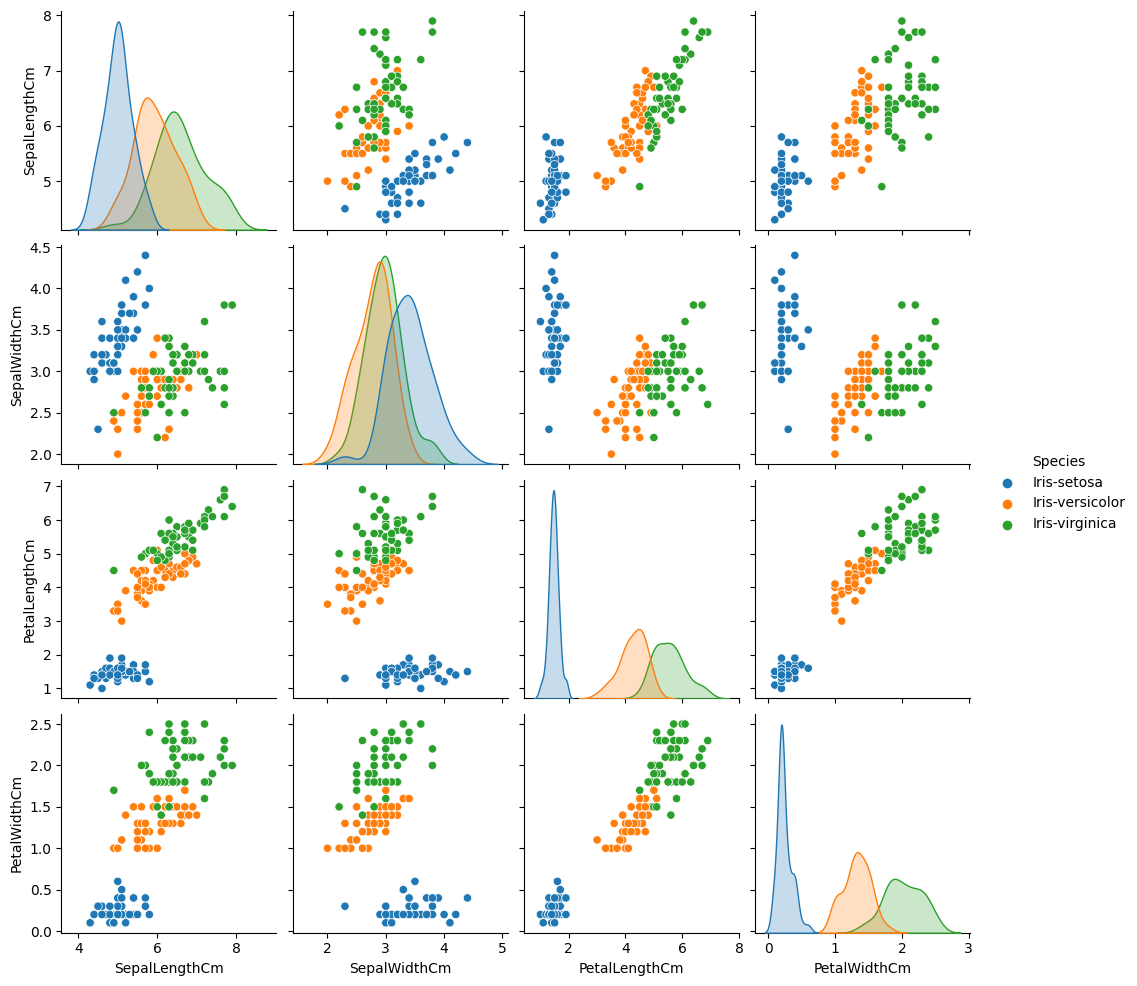

In [10]:
# Pairplot
sns.pairplot(data = data, hue = 'Species')
plt.show()

In [11]:
# Creating the independent (X) and dependent (y) features
X = data.iloc[:, 0:-1].values
y = data.iloc[:, -1].values

In [12]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [13]:
# Training a DT model
classifier = DecisionTreeClassifier()
# Fit the model
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:
# Making predictions
y_pred = classifier.predict(X_test)

In [15]:
print("Model Accuracy Score on totally unseen data (X_test) is: ", (accuracy_score(y_test, y_pred) * 100), '%')
print(multilabel_confusion_matrix(y_test, y_pred))

Model Accuracy Score on totally unseen data (X_test) is:  100.0 %
[[[20  0]
  [ 0 10]]

 [[21  0]
  [ 0  9]]

 [[19  0]
  [ 0 11]]]


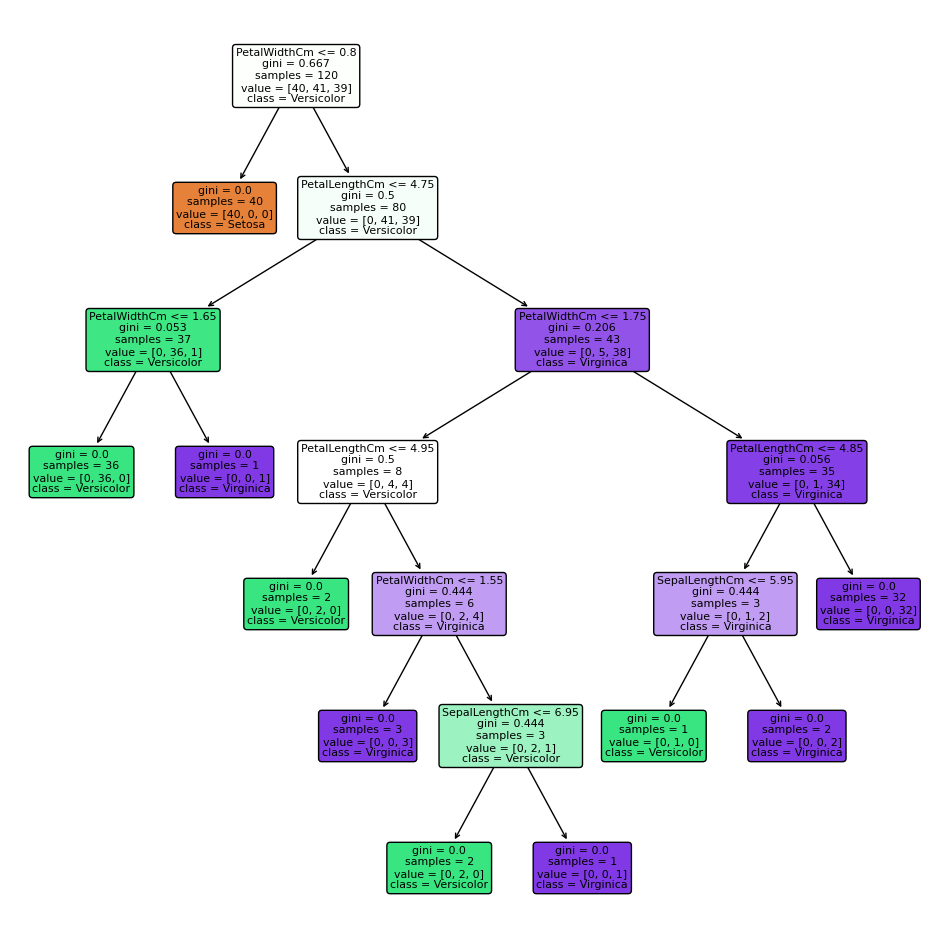

In [16]:
plt.figure(figsize = (12, 12))
tree.plot_tree(classifier,
               feature_names = data.columns,
               class_names = ['Setosa', 'Versicolor', 'Virginica'],
               filled = True,
               rounded=True);
plt.show()